#**Machine Learning Assignment on Video Memorability Prediction**

This python notebook is classified into two main subsections :


1. **Exploration** - for predicting memorability based on the following features:
    a. Video feature: HMP features
    b. Video feature: C3D features


2. **Final ML Model** - Final ML Model has the best model that is chose based on the conclusion obtained from the exploration part.


#**(I). Exploration**


##**Importing necessary libraries and files**




###Importing required libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import glob
import datetime 
import pickle


###Mounting Required files

In [ ]:
from google.colab import drive
import os
# mounting a specific directory on my google drive for data storage and retrieval
drive.mount('/content/drive/')
path_def='/content/drive/My Drive/ML/CA684_Assignment/'
os.chdir(path_def)
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Additional_Resources  Complete_Sources	Model_Scores.gsheet  Tutorials
Assignment_Overview   Dev-set		Test-set


##**Function Definitions**

##Define pickle functions

In [ ]:
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/ML/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/ML/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


##Function- HMP Features. 

In [ ]:
#Function for reading HMP Features. 
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP  

##Function- C3D Features.

In [ ]:
#Function for reading C3D Features.  
def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

##Function for calculating Spearman's correlation coefficient

In [ ]:
#Function for getting Spearman's correlation coefficient
def Get_score(Y_pred,Y_true,Variable_name):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient of '+Variable_name + 'is : %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])   

##**Training Test**

### Importing ground-truth data set as training set.




In [ ]:
df_train_ground_truth = pd.read_csv("/content/drive/MyDrive/ML/CA684_Assignment/Dev-set/Ground-truth/ground-truth.csv")
df_train_ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


###Dropping the irrelevant columns  



In [ ]:
#Drop the columns such as 'nb_short-term_annotations' and 'nb_long-term_annotations' that have less influence for determining memorability score.
df_train_ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis =1, inplace=True)
df_train_ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video3.webm,0.924,0.846
1,video4.webm,0.923,0.667
2,video6.webm,0.863,0.700
3,video8.webm,0.922,0.818
4,video10.webm,0.950,0.900


### Write ground truth data frame into pickle file

In [ ]:
write_pickle(df_train_ground_truth,'df_train_ground_truth.p')

Start Pickle Load time: 2021-04-27 12:51:36.480998
End Pickle Load time: 2021-04-27 12:51:36.495824   Duration:0:00:00.014826


##**Loading Features**

##**I. Video feature: HMP Features**

###Create a lists for saving video names and features.

In [ ]:
HMPFeatures_list= []
videoNames_list = []

for filename in glob.glob(path_def+'Dev-set/HMP/*.txt'):
    
    name = ((filename.split('/')[-1]).split('.')[0])
    videoNames_list.append(name)
    HMPFeatures = read_HMP(filename)
    HMPFeatures_list.append(HMPFeatures)

In [ ]:
#display video list
videoNames_list

['video6634',
 'video6633',
 'video6639',
 'video6635',
 'video6637',
 'video6632',
 'video6643',
 'video664',
 'video6640',
 'video6641',
 'video6645',
 'video6650',
 'video6648',
 'video6646',
 'video6649',
 'video6647',
 'video6651',
 'video6652',
 'video665',
 'video6654',
 'video6655',
 'video6662',
 'video6661',
 'video6658',
 'video6656',
 'video6659',
 'video6663',
 'video6660',
 'video6667',
 'video6664',
 'video6672',
 'video6673',
 'video6670',
 'video6671',
 'video6675',
 'video667',
 'video6669',
 'video6676',
 'video6668',
 'video6674',
 'video6677',
 'video6681',
 'video6678',
 'video6684',
 'video6680',
 'video6682',
 'video6687',
 'video6686',
 'video668',
 'video6683',
 'video6694',
 'video6692',
 'video6689',
 'video6696',
 'video6699',
 'video6695',
 'video6690',
 'video669',
 'video6691',
 'video6688',
 'video67',
 'video6703',
 'video6702',
 'video6710',
 'video671',
 'video6700',
 'video6704',
 'video6707',
 'video6706',
 'video6708',
 'video6711',
 'video6718',


In [ ]:
#display HMPFeatures_list
HMPFeatures_list 

[array([1.2099e-02, 1.4660e-03, 1.7000e-05, ..., 1.3500e-04, 1.1100e-04,
        7.6000e-05]),
 array([7.8170e-02, 1.3597e-02, 1.2200e-04, ..., 5.2000e-05, 8.2000e-05,
        6.1000e-05]),
 array([0.112506, 0.014053, 0.000263, ..., 0.000285, 0.000504, 0.000179]),
 array([0.066072, 0.012682, 0.000283, ..., 0.000307, 0.001239, 0.001047]),
 array([3.036e-02, 5.834e-03, 1.690e-04, ..., 3.590e-04, 3.750e-04,
        8.800e-05]),
 array([3.9992e-02, 7.2490e-03, 1.1500e-04, ..., 9.7000e-05, 1.6900e-04,
        1.1000e-04]),
 array([0.009481, 0.003459, 0.000139, ..., 0.000303, 0.000831, 0.000277]),
 array([5.834e-03, 3.368e-03, 2.410e-04, ..., 6.900e-04, 7.160e-04,
        7.000e-05]),
 array([0.0056  , 0.001756, 0.000225, ..., 0.000429, 0.00104 , 0.001865]),
 array([0.014799, 0.004813, 0.000304, ..., 0.000335, 0.000685, 0.000869]),
 array([1.8405e-02, 2.8870e-03, 1.0600e-04, ..., 3.8400e-04, 2.0600e-04,
        4.4000e-05]),
 array([3.3636e-02, 8.2670e-03, 1.4300e-04, ..., 2.0000e-04, 2.4900

In [ ]:
# Store it into variable 'df_HMP'
df_HMP=pd.DataFrame(HMPFeatures_list)


In [ ]:
# Store it into variable 'df_HMP_Video' 
df_HMP_Video=pd.DataFrame(videoNames_list)
#give name to column as video
df_HMP_Video.columns=['video']

In [ ]:
#Join two variables
df_HMPJoin=pd.concat([df_HMP_Video,df_HMP],axis=1)
df_HMPJoin

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video6634,0.012099,0.001466,0.000017,0.0,0.000683,0.000007,0.0,0.000000,0.000007,0.0,0.0,0.0,0.0,0.000170,0.000002,0.0,0.000002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000236,0.000239,0.000324,0.000151,0.000106,0.000050,0.000014,0.000156,0.000123,0.000031,0.000163,0.000177,0.000097,0.000047,0.000021,0.000002,0.000019,0.000021,0.000000,0.000002,0.000009,0.000002,0.000059,0.000024,0.000007,0.000057,0.000052,0.000012,0.000026,0.000007,0.000014,0.000057,0.000028,0.000007,0.000059,0.000097,0.000012,0.000135,0.000111,0.000076
1,video6633,0.078170,0.013597,0.000122,0.0,0.005590,0.000074,0.0,0.000000,0.000026,0.0,0.0,0.0,0.0,0.001137,0.000017,0.0,0.000000,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000048,0.000069,0.000091,0.000026,0.000061,0.000022,0.000004,0.000091,0.000048,0.000013,0.000043,0.000095,0.000030,0.000043,0.000013,0.000000,0.000039,0.000026,0.000000,0.000009,0.000013,0.000000,0.000069,0.000026,0.000004,0.000143,0.000139,0.000009,0.000017,0.000043,0.000022,0.000043,0.000026,0.000004,0.000078,0.000074,0.000022,0.000052,0.000082,0.000061
2,video6639,0.112506,0.014053,0.000263,0.0,0.043205,0.000560,0.0,0.000005,0.000364,0.0,0.0,0.0,0.0,0.002472,0.000206,0.0,0.000002,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000184,0.000310,0.000629,0.000263,0.000145,0.000061,0.000002,0.000098,0.000248,0.000007,0.000125,0.000354,0.000076,0.000135,0.000049,0.000000,0.000074,0.000103,0.000000,0.000012,0.000039,0.000002,0.000066,0.000012,0.000002,0.000098,0.000221,0.000012,0.000029,0.000076,0.000022,0.000261,0.000069,0.000000,0.000157,0.000558,0.000017,0.000285,0.000504,0.000179
3,video6635,0.066072,0.012682,0.000283,0.0,0.006425,0.000375,0.0,0.000002,0.000174,0.0,0.0,0.0,0.0,0.002373,0.000152,0.0,0.000002,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000492,0.000278,0.000744,0.000484,0.000155,0.000077,0.000000,0.000161,0.000563,0.000084,0.000132,0.000375,0.000358,0.000227,0.000075,0.000002,0.000077,0.000135,0.000007,0.000009,0.000011,0.000007,0.000190,0.000049,0.000004,0.000305,0.001002,0.000099,0.000038,0.000106,0.000075,0.000495,0.000210,0.000002,0.000342,0.002027,0.000124,0.000307,0.001239,0.001047
4,video6637,0.030360,0.005834,0.000169,0.0,0.006578,0.000542,0.0,0.000016,0.000373,0.0,0.0,0.0,0.0,0.001041,0.000113,0.0,0.000007,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000334,0.000696,0.001019,0.000197,0.000239,0.000111,0.000011,0.000298,0.000389,0.000056,0.000291,0.000395,0.000090,0.000115,0.000052,0.000002,0.000054,0.000070,0.000007,0.000014,0.000041,0.000011,0.000124,0.000045,0.000005,0.000176,0.000181,0.000029,0.000052,0.000090,0.000027,0.000199,0.000061,0.000002,0.000228,0.000253,0.000023,0.000359,0.000375,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,video2126,0.010845,0.002114,0.000075,0.0,0.001033,0.000042,0.0,0.000000,0.000018,0.0,0.0,0.0,0.0,0.000235,0.000035,0.0,0.000000,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000257,0.000153,0.000414,0.000222,0.000111,0.000069,0.000002,0.000102,0.000246,0.000035,0.000131,0.000275,0.000106,0.000095,0.000040,0.000004,0.000038,0.0000

### Write joined dataframe into pickle file

In [ ]:
#Write it into pickle file
write_pickle(df_HMPJoin,'df_train_HMP.p')

Start Pickle Load time: 2021-04-27 12:53:17.907312
End Pickle Load time: 2021-04-27 12:53:19.260091   Duration:0:00:01.352779


In [ ]:
#read pickle file of ground truth
df_train_ground_truth=read_pickle('df_train_ground_truth.p')

Start Pickle Load time: 2021-04-27 12:53:22.748042
End Pickle Load time: 2021-04-27 12:53:22.757175   Duration:0:00:00.009133


In [ ]:
df_train_ground_truth.head(5)

,video,short-term_memorability,long-term_memorability
0,video3.webm,0.924,0.846
1,video4.webm,0.923,0.667
2,video6.webm,0.863,0.700
3,video8.webm,0.922,0.818
4,video10.webm,0.950,0.900


In [ ]:
df_train_ground_truth['video'] = df_train_ground_truth['video'].apply(lambda x:x.split('.')[0])#remove extension of videoname

In [ ]:
#Display ground truth df
df_train_ground_truth.head(5)

,video,short-term_memorability,long-term_memorability
0,video3,0.924,0.846
1,video4,0.923,0.667
2,video6,0.863,0.700
3,video8,0.922,0.818
4,video10,0.950,0.900


In [ ]:
write_pickle(df_train_ground_truth,'df_train_ground_truth.p')

Start Pickle Load time: 2021-04-27 12:53:35.485700
End Pickle Load time: 2021-04-27 12:53:35.502661   Duration:0:00:00.016961


In [ ]:
#read pickle file of ground truth
df_train_ground_truth=read_pickle('df_train_ground_truth.p')
#Display  ground truth
df_train_ground_truth.head(5)

Start Pickle Load time: 2021-04-27 12:53:38.306598
End Pickle Load time: 2021-04-27 12:53:38.318241   Duration:0:00:00.011643


,video,short-term_memorability,long-term_memorability
0,video3,0.924,0.846
1,video4,0.923,0.667
2,video6,0.863,0.700
3,video8,0.922,0.818
4,video10,0.950,0.900


In [ ]:
#read pickle file of df_HMPJoin
df_train_HMP=read_pickle('df_train_HMP.p')
#Display HMP df
df_train_HMP.head(5)

Start Pickle Load time: 2021-04-27 12:53:42.117989
End Pickle Load time: 2021-04-27 12:53:42.851047   Duration:0:00:00.733058


,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video6634,0.012099,0.001466,0.000017,0.0,0.000683,0.000007,0.0,0.000000,0.000007,0.0,0.0,0.0,0.0,0.000170,0.000002,0.0,0.000002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000236,0.000239,0.000324,0.000151,0.000106,0.000050,0.000014,0.000156,0.000123,0.000031,0.000163,0.000177,0.000097,0.000047,0.000021,0.000002,0.000019,0.000021,0.000000,0.000002,0.000009,0.000002,0.000059,0.000024,0.000007,0.000057,0.000052,0.000012,0.000026,0.000007,0.000014,0.000057,0.000028,0.000007,0.000059,0.000097,0.000012,0.000135,0.000111,0.000076
1,video6633,0.078170,0.013597,0.000122,0.0,0.005590,0.000074,0.0,0.000000,0.000026,0.0,0.0,0.0,0.0,0.001137,0.000017,0.0,0.000000,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000048,0.000069,0.000091,0.000026,0.000061,0.000022,0.000004,0.000091,0.000048,0.000013,0.000043,0.000095,0.000030,0.000043,0.000013,0.000000,0.000039,0.000026,0.000000,0.000009,0.000013,0.000000,0.000069,0.000026,0.000004,0.000143,0.000139,0.000009,0.000017,0.000043,0.000022,0.000043,0.000026,0.000004,0.000078,0.000074,0.000022,0.000052,0.000082,0.000061
2,video6639,0.112506,0.014053,0.000263,0.0,0.043205,0.000560,0.0,0.000005,0.000364,0.0,0.0,0.0,0.0,0.002472,0.000206,0.0,0.000002,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000184,0.000310,0.000629,0.000263,0.000145,0.000061,0.000002,0.000098,0.000248,0.000007,0.000125,0.000354,0.000076,0.000135,0.000049,0.000000,0.000074,0.000103,0.000000,0.000012,0.000039,0.000002,0.000066,0.000012,0.000002,0.000098,0.000221,0.000012,0.000029,0.000076,0.000022,0.000261,0.000069,0.000000,0.000157,0.000558,0.000017,0.000285,0.000504,0.000179
3,video6635,0.066072,0.012682,0.000283,0.0,0.006425,0.000375,0.0,0.000002,0.000174,0.0,0.0,0.0,0.0,0.002373,0.000152,0.0,0.000002,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000492,0.000278,0.000744,0.000484,0.000155,0.000077,0.000000,0.000161,0.000563,0.000084,0.000132,0.000375,0.000358,0.000227,0.000075,0.000002,0.000077,0.000135,0.000007,0.000009,0.000011,0.000007,0.000190,0.000049,0.000004,0.000305,0.001002,0.000099,0.000038,0.000106,0.000075,0.000495,0.000210,0.000002,0.000342,0.002027,0.000124,0.000307,0.001239,0.001047
4,video6637,0.030360,0.005834,0.000169,0.0,0.006578,0.000542,0.0,0.000016,0.000373,0.0,0.0,0.0,0.0,0.001041,0.000113,0.0,0.000007,0.000102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000334,0.000696,0.001019,0.000197,0.000239,0.000111,0.000011,0.000298,0.000389,0.000056,0.000291,0.000395,0.000090,0.000115,0.000052,0.000002,0.000054,0.000070,0.000007,0.000014,0.000041,0.000011,0.000124,0.000045,0.000005,0.000176,0.000181,0.000029,0.000052,0.000090,0.000027,0.000199,0.000061,0.000002,0.000228,0.000253,0.000023,0.000359,0.000375,0.000088


###A. **Short Term Memorability-HMP**

####Create a training set for short-term_memorability  by joining ground truth data set with HMP features.

In [ ]:
#Create training set for short-term_memorability 
df_train_GTShortMem_HMP= pd.merge(df_train_ground_truth[['video','short-term_memorability']],df_train_HMP,on ='video')


In [ ]:
df_train_GTShortMem_HMP.head(5)

,video,short-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video3,0.924,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,0.000000,0.000086,0.0,0.0,0.0,0.0,0.002795,0.000054,0.0,0.000000,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000173,0.000459,0.000000,0.000148,0.000104,0.000000,0.000121,0.000551,0.000000,0.000114,0.000884,0.000002,0.000116,0.000077,0.000002,0.000027,0.000136,0.000000,0.000000,0.000002,0.000000,0.000091,0.000035,0.000000,0.000163,0.000467,0.000002,0.000010,0.000017,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,video4,0.923,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,0.000000,0.000079,0.0,0.0,0.0,0.0,0.000246,0.000024,0.0,0.000000,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000685,0.000308,0.001054,0.000751,0.000176,0.000062,0.000000,0.000123,0.000398,0.000086,0.000246,0.000433,0.000446,0.000143,0.000053,0.000000,0.000053,0.000099,0.000009,0.000004,0.000033,0.000004,0.000051,0.000035,0.000000,0.000062,0.000358,0.000035,0.000024,0.000083,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,video6,0.863,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,0.000002,0.000088,0.0,0.0,0.0,0.0,0.002046,0.000061,0.0,0.000000,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000083,0.000057,0.000158,0.000073,0.000021,0.000009,0.000002,0.000019,0.000095,0.000021,0.000019,0.000090,0.000073,0.000050,0.000024,0.000000,0.000012,0.000021,0.000000,0.000000,0.000002,0.000000,0.000017,0.000007,0.000002,0.000066,0.000203,0.000026,0.000002,0.000040,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,video8,0.922,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,0.000024,0.000713,0.0,0.0,0.0,0.0,0.002496,0.000149,0.0,0.000011,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000210,0.000434,0.000543,0.000412,0.000412,0.000045,0.000003,0.000144,0.000282,0.000037,0.000197,0.000218,0.000157,0.000237,0.000021,0.000000,0.000040,0.000056,0.000008,0.000005,0.000013,0.000019,0.000168,0.000013,0.000000,0.000133,0.000202,0.000029,0.000029,0.000035,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,video10,0.950,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.000147,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000160,0.000996,0.001604,0.000103,0.000768,0.000215,0.000009,0.000415,0.000926,0.000020,0.000538,0.001178,0.000050,0.000518,0.000169,0.000007,0.000134,0.000169,0.000007,0.000026,0.000046,0.000007,0.000373,0.000088,0.000000,0.000338,0.000441,0.000029,0.000070,0.000149,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064


#### Write training set it into pickle file

In [ ]:
#write short_term_memorability in pickle file
write_pickle(df_train_GTShortMem_HMP,'df_train_GTShortMem_HMP.p')

Start Pickle Load time: 2021-04-27 12:54:11.054908
End Pickle Load time: 2021-04-27 12:54:12.842634   Duration:0:00:01.787726


####**Building Models For Short Term Memorability**

##### Create X and Y_Short varaibles

In [ ]:
#Assign features to X and Y_Short
X = df_train_GTShortMem_HMP.iloc[:,2:6077].values 
Y_Short = df_train_GTShortMem_HMP.iloc[:,1:2].values #short-term-memorability


#####Find the no of columns where all zero entries in dataframes.(found 1189 columns)



In [ ]:
#select columns with all zero entries in dataframe
df_train_GTShortMem_HMP.columns[(df_train_GTShortMem_HMP == 0).all()]
#drop the coulmns with all zero entries in dataframe
#df_train_GTShortMem_HMP=df_train_GTShortMem_HMP.drop(df_train_GTShortMem_HMP.columns[(df_train_GTShortMem_HMP == 0).all()], axis = 1)


Index([   3,    6,    9,   10,   11,   12,   15,   18,   19,   20,
       ...
       5381, 5400, 5401, 5402, 5403, 5404, 5405, 5406, 5407, 5408],
      dtype='object', length=1189)

#####Apply Standard Scaler For X

In [ ]:
#Implement StandardScaler for X variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
Scaled_X=scaler.transform(X)

In [ ]:
Scaled_X

array([[ 2.69906082,  2.82753609,  0.74222932, ..., -0.80931316,
        -0.83793797,  0.01829089],
       [-0.58870414, -0.72242994, -0.50681636, ...,  0.66970343,
        -0.30235217,  0.42079878],
       [ 2.25398685,  2.03356182,  0.61529378, ..., -0.29008393,
        -0.97383288, -0.69383846],
       ...,
       [-0.15382461,  0.22161144,  0.78284869, ..., -0.11700752,
         1.83999102,  0.36772082],
       [-0.38331109, -0.22231091, -0.3494163 , ..., -0.80931316,
        -0.92586997, -1.12288534],
       [ 0.36015936,  1.10254928,  1.42260379, ..., -0.22714705,
        -0.02656546,  0.92061628]])

#####Spliting data set sets into training sets and testing sets

In [ ]:
#Spliting data set sets into training sets and testing sets(80% of data as training set and 20% data as testing set )
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Short_Train,Y_Short_Test = train_test_split(Scaled_X, Y_Short, test_size = 0.20)

#####Apply PCA

In [ ]:
#Apply PCA
from sklearn.decomposition import PCA
PCA_Model = PCA(0.95)
PCA_X_Train=PCA_Model.fit_transform(X_Train)
PCA_X_Train.shape
PCA_X_Test=PCA_Model.transform(X_Test)



In [ ]:
PCA_X_Train

array([[ 1.54426731e+01,  2.46248625e+01, -2.72150056e+01, ...,
         5.04186171e-01, -2.73881428e-01, -8.16021307e-02],
       [-3.02672902e+01, -3.55629372e+01,  4.84711031e+00, ...,
        -8.21638945e-01, -5.08044389e-01, -5.00656866e-01],
       [-8.23309147e+00, -5.42297985e+01,  3.38642854e+00, ...,
        -3.09353323e-01, -1.35812478e+00,  5.23681462e-01],
       ...,
       [-1.27583926e+01, -1.65336771e+01, -9.91590228e-01, ...,
        -4.61449058e-03, -1.63330352e-01,  1.34086589e-01],
       [ 3.07255262e+01, -5.51661326e+00,  2.71662849e+01, ...,
        -1.05772159e+00,  3.57326102e-01, -4.74640960e-01],
       [-1.26896217e+00, -1.12396712e+01, -1.58732703e+01, ...,
        -3.51483757e-01, -7.02135078e-01,  8.82407992e-01]])

#####**Implement Different Models**

######**1.Apply Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
Model1 = LinearRegression()
Model1.fit(PCA_X_Train, Y_Short_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted1 = Model1.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted1,Y_Short_Test,'Y_Short_Predicted1')

The Spearman's correlation coefficient of Y_Short_Predicted1is : 0.243


######**2. Apply Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Model2 = DecisionTreeRegressor()
Model2.fit(PCA_X_Train, Y_Short_Train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted2 = Model2.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted2,Y_Short_Test,'Y_Short_Predicted2')

The Spearman's correlation coefficient of Y_Short_Predicted2is : 0.090


######**3.Apply Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Model3 = GradientBoostingRegressor(random_state=0)
Model3.fit(PCA_X_Train,Y_Short_Train)




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted3 = Model3.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted3,Y_Short_Test,'Y_Short_Predicted3')



The Spearman's correlation coefficient of Y_Short_Predicted3is : 0.237


######**4. Apply Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model4 = RandomForestRegressor(n_estimators=100)
Model4.fit(PCA_X_Train,Y_Short_Train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted4 = Model4.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted4,Y_Short_Test,'Y_Short_Predicted3')

The Spearman's correlation coefficient of Y_Short_Predicted3is : 0.216


### **B. Long Term Memorability - HMP**

####Create a training set for long-term_memorability by joining ground truth data set with HMP features.

In [ ]:
#Create training set for long-term_memorability
df_train_GTLongMem_HMP= pd.merge(df_train_ground_truth[['video','long-term_memorability']],df_train_HMP,on ='video')


In [ ]:
df_train_GTLongMem_HMP.head(5)

,video,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video3,0.846,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,0.000000,0.000086,0.0,0.0,0.0,0.0,0.002795,0.000054,0.0,0.000000,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000173,0.000459,0.000000,0.000148,0.000104,0.000000,0.000121,0.000551,0.000000,0.000114,0.000884,0.000002,0.000116,0.000077,0.000002,0.000027,0.000136,0.000000,0.000000,0.000002,0.000000,0.000091,0.000035,0.000000,0.000163,0.000467,0.000002,0.000010,0.000017,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,video4,0.667,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,0.000000,0.000079,0.0,0.0,0.0,0.0,0.000246,0.000024,0.0,0.000000,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000685,0.000308,0.001054,0.000751,0.000176,0.000062,0.000000,0.000123,0.000398,0.000086,0.000246,0.000433,0.000446,0.000143,0.000053,0.000000,0.000053,0.000099,0.000009,0.000004,0.000033,0.000004,0.000051,0.000035,0.000000,0.000062,0.000358,0.000035,0.000024,0.000083,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,video6,0.700,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,0.000002,0.000088,0.0,0.0,0.0,0.0,0.002046,0.000061,0.0,0.000000,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000083,0.000057,0.000158,0.000073,0.000021,0.000009,0.000002,0.000019,0.000095,0.000021,0.000019,0.000090,0.000073,0.000050,0.000024,0.000000,0.000012,0.000021,0.000000,0.000000,0.000002,0.000000,0.000017,0.000007,0.000002,0.000066,0.000203,0.000026,0.000002,0.000040,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,video8,0.818,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,0.000024,0.000713,0.0,0.0,0.0,0.0,0.002496,0.000149,0.0,0.000011,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000210,0.000434,0.000543,0.000412,0.000412,0.000045,0.000003,0.000144,0.000282,0.000037,0.000197,0.000218,0.000157,0.000237,0.000021,0.000000,0.000040,0.000056,0.000008,0.000005,0.000013,0.000019,0.000168,0.000013,0.000000,0.000133,0.000202,0.000029,0.000029,0.000035,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,video10,0.900,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.000147,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000160,0.000996,0.001604,0.000103,0.000768,0.000215,0.000009,0.000415,0.000926,0.000020,0.000538,0.001178,0.000050,0.000518,0.000169,0.000007,0.000134,0.000169,0.000007,0.000026,0.000046,0.000007,0.000373,0.000088,0.000000,0.000338,0.000441,0.000029,0.000070,0.000149,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064



#### Write training set it into pickle file


In [ ]:
#write short_term_memorability in pickle file
write_pickle(df_train_GTLongMem_HMP,'df_train_GTLongMem_HMP.p')

Start Pickle Load time: 2021-04-27 13:28:59.163911
End Pickle Load time: 2021-04-27 13:29:04.553701   Duration:0:00:05.389790


####**Building Models For Long Term Memorability**

#####Create Y_Long variable

In [ ]:
#Assign features to Y_Long
Y_Long = df_train_GTShortMem_HMP.iloc[:,1:2].values #long-term-memorability


#####Spliting data set sets into training sets and testing sets.

In [ ]:
#Spliting data set sets into training sets and testing sets(80% of data as training set and 20% data as testing set )
X_Train, X_Test, Y_Long_Train,Y_Long_Test = train_test_split(Scaled_X, Y_Long, test_size = 0.20)

######**1.Apply LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
Model5 = LinearRegression()
Model5.fit(PCA_X_Train, Y_Long_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted1 = Model5.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted1,Y_Long_Test,'Y_Long_Predicted1')

The Spearman's correlation coefficient of Y_Long_Predicted1is : -0.033


######**2. Apply Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Model6 = DecisionTreeRegressor()
Model6.fit(PCA_X_Train, Y_Long_Train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted2 = Model6.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted2,Y_Long_Test,'Y_Long_Predicted2')

The Spearman's correlation coefficient of Y_Long_Predicted2is : -0.006


######**3.Apply Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Model7 = GradientBoostingRegressor(random_state=0)
Model7.fit(PCA_X_Train,Y_Long_Train)




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted3 = Model7.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted3,Y_Long_Test,'Y_Long_Predicted3')



The Spearman's correlation coefficient of Y_Long_Predicted3is : 0.015


######**4. Apply Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model8 = RandomForestRegressor(n_estimators=100)
Model8.fit(PCA_X_Train,Y_Long_Train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted4 = Model8.predict(PCA_X_Test)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted4,Y_Long_Test,'Y_Long_Predicted3')

The Spearman's correlation coefficient of Y_Long_Predicted3is : 0.049


##**II.Video Feature : C3D Features**

###Create a lists for saving video names and features.

In [ ]:
C3DFeatures_list= []
videoNames_list = []
for filename in glob.glob(path_def+'Dev-set/C3D/*.txt'):
    name = ((filename.split('/')[-1]).split('.')[0])
    videoNames_list.append(name)
    C3DFeatures = read_C3D(filename)
    C3DFeatures_list.append(C3DFeatures)

In [ ]:
videoNames_list #display video list

['video6632',
 'video6634',
 'video6633',
 'video6645',
 'video6643',
 'video6637',
 'video6640',
 'video664',
 'video6635',
 'video6641',
 'video6639',
 'video6646',
 'video6647',
 'video6648',
 'video6649',
 'video6650',
 'video6659',
 'video6660',
 'video6656',
 'video6661',
 'video6662',
 'video6651',
 'video6654',
 'video6652',
 'video665',
 'video6655',
 'video6658',
 'video6663',
 'video6664',
 'video6667',
 'video6668',
 'video6669',
 'video6676',
 'video6677',
 'video6678',
 'video667',
 'video6673',
 'video6672',
 'video6674',
 'video6670',
 'video6671',
 'video6675',
 'video668',
 'video6680',
 'video6681',
 'video669',
 'video6690',
 'video6686',
 'video6688',
 'video6682',
 'video6683',
 'video6687',
 'video6684',
 'video6689',
 'video6691',
 'video6692',
 'video6694',
 'video6695',
 'video67',
 'video6707',
 'video6708',
 'video6702',
 'video6699',
 'video6696',
 'video6700',
 'video6706',
 'video6703',
 'video6704',
 'video671',
 'video6710',
 'video6711',
 'video6712',


In [ ]:
C3DFeatures_list #display C3DFeatures_list

[[0.01085767,
  0.01038633,
  0.0,
  0.0,
  0.0,
  0.0,
  2.7e-07,
  0.0,
  1e-08,
  3.4e-07,
  8e-08,
  1e-08,
  3.76e-06,
  0.00010543,
  0.0,
  4e-08,
  1e-08,
  0.0,
  0.0,
  0.00013318,
  0.0,
  0.0,
  0.0,
  0.0,
  7.6e-07,
  0.0,
  9.8e-07,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6e-08,
  2.108e-05,
  5e-08,
  0.0,
  1e-08,
  3e-08,
  2e-08,
  0.0,
  5e-07,
  0.0,
  1e-08,
  0.0,
  1e-08,
  1.37e-06,
  1e-08,
  3e-08,
  2e-08,
  0.0,
  0.0,
  0.0,
  1.015e-05,
  0.00529564,
  0.0,
  0.0,
  0.0,
  0.0,
  5.829e-05,
  2.417e-05,
  4.6e-07,
  0.00162252,
  0.97012538,
  1.565e-05,
  0.00129776,
  3.158e-05,
  1.04e-06,
  0.0,
  0.0,
  1e-08,
  2.5e-07,
  0.0,
  0.0,
  5e-08,
  0.0,
  1e-08,
  1e-08,
  4.2e-07,
  0.0,
  3e-08,
  2e-08,
  0.0,
  0.0,
  0.0,
  6e-08,
  0.0,
  0.0,
  9e-08,
  0.0,
  0.0,
  1.1e-07,
  1.4e-07,
  0.0,
  0.0,
  1.7e-07,
  0.0,
  0.0,
  1e-08,
  1.3e-06,
  2.6e-06,
  8e-08],
 [0.00019951,
  6.494e-05,
  0.9938069,
  2e-07,
  4.7e-07,
  7.339e-05,
  3.7e-06,
 

In [ ]:
# Store it into variable 'df_C3D'
df_C3D=pd.DataFrame(C3DFeatures_list)


In [ ]:
# Store it into variable 'df_C3D_Video' 
df_C3D_Video=pd.DataFrame(videoNames_list)
#give name to column as video
df_C3D_Video.columns=['video']

In [ ]:
#Join two variables
df_C3DJoin=pd.concat([df_C3D_Video,df_C3D],axis=1)
df_C3DJoin

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video6632,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e-07,0.000000e+00,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000e+00,1.331800e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e-07,0.000000e+00,9.800000e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,...,0.001623,0.970125,0.000016,0.001298,0.000032,0.000001,0.000000,0.000000e+00,1.000000e-08,2.500000e-07,0.000000e+00,0.000000e+00,5.000000e-08,0.000000e+00,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000e+00,6.000000e-08,0.000000e+00,0.000000e+00,9.000000e-08,0.000000e+00,0.000000e+00,1.100000e-07,1.400000e-07,0.000000e+00,0.000000e+00,1.700000e-07,0.000000e+00,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08
1,video6634,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,7.339000e-05,3.700000e-06,3.371100e-04,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,2.710000e-06,2.300000e-07,1.900000e-07,2.937620e-03,5.200000e-07,9.200000e-07,1.136000e-05,1.055000e-05,3.310400e-04,9.200000e-07,2.189000e-05,8.000000e-08,2.769000e-05,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,...,0.000045,0.000027,0.000013,0.000077,0.000050,0.000138,0.000012,7.190000e-06,4.100000e-07,5.440000e-06,3.400000e-07,6.870000e-06,8.399000e-05,4.070000e-06,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,1.361000e-05,4.090000e-06,3.320000e-06,4.600000e-06,4.920000e-06,5.290000e-06,6.400000e-07,2.372000e-05,6.610000e-06,1.024000e-05,2.030000e-06,5.800000e-06,1.490000e-06,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04
2,video6633,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.750000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06
3,video6645,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,1.288200e-04,4.665300e-04,1.026567e-02,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,4.019180e-03,2.390960e-03,1.206900e-04,8.488490e-03,5.216200e-04,4.164600e-04,1.643420e-02,4.968638e-02,1.470550e-03,5.432000e-05,1.055230e-03,5.442770e-03,1.727700e-04,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,...,0.021621,0.000639,0.014109,0.000472,0.002461,0.004046,0.000905,9.967200e-04,2.514660e-03,1.587440e-03,1.125030e-03,1.008410e-03,2.133877e-02,6.474700e-04,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,2.065825e-02,3.349520e-03,2.637110e-03,9.376000e-05,1.170705e-02,2.290900e-04,9.789210e-03,2.76

### Write joined dataframe into pickle file.

In [ ]:
#Write it into pickle file
write_pickle(df_C3DJoin,'df_train_C3D.p')

Start Pickle Load time: 2021-04-27 14:14:30.671560
End Pickle Load time: 2021-04-27 14:14:30.712977   Duration:0:00:00.041417


In [ ]:
#read pickle file of ground truth
df_train_ground_truth=read_pickle('df_train_ground_truth.p')

Start Pickle Load time: 2021-04-27 14:14:34.430422
End Pickle Load time: 2021-04-27 14:14:34.447208   Duration:0:00:00.016786


In [ ]:
#read pickle file of df_train_C3D
df_train_C3D=read_pickle('df_train_C3D.p')

Start Pickle Load time: 2021-04-27 14:14:38.635562
End Pickle Load time: 2021-04-27 14:14:38.661022   Duration:0:00:00.025460


In [ ]:
#Display df_train_C3D
df_train_C3D.head(5)

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video6632,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,...,0.001623,0.970125,0.000016,0.001298,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08
1,video6634,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,...,0.000045,0.000027,0.000013,0.000077,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04
2,video6633,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06
3,video6645,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,0.004019,2.390960e-03,1.206900e-04,0.008488,5.216200e-04,4.164600e-04,1.643420e-02,0.049686,1.470550e-03,5.432000e-05,0.001055,5.442770e-03,0.000173,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,...,0.021621,0.000639,0.014109,0.000472,0.002461,0.004046,0.000905,0.000997,2.514660e-03,1.587440e-03,1.125030e-03,0.001008,2.133877e-02,0.000647,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,0.020658,3.349520e-03,0.002637,0.000094,1.170705e-02,0.000229,9.789210e-03,2.764390e-03,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03
4,video6643,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.000003,1.984000e-05,5.750000e-06,6.642000e-0

###**A. Short Term Memorability - C3D**

####Create a training set for short-term_memorability  by joining ground truth data set with C3D features.

In [ ]:
#Create training set for short-term_memorability
df_train_GTShortMem_C3D= pd.merge(df_train_ground_truth[['video','short-term_memorability']],df_train_C3D,on ='video')


In [ ]:
df_train_GTShortMem_C3D.head(5)

,video,short-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video3,0.924,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,0.000097,0.000022,0.000010,0.000337,0.000636,1.111700e-04,0.001008,0.000004,0.000631,3.905000e-05,0.000041,0.000091,0.000303,1.541000e-05,0.000032,5.221000e-05,0.000062,0.017465,0.000666,0.000065,0.000054,0.000273,0.001386,0.000003,0.001356,0.000517,2.426120e-03,0.002719,2.770000e-06,0.001557,0.000249,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,2.502000e-05,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4,0.923,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,0.000011,0.000017,0.000014,0.000336,0.004081,5.900000e-07,0.000411,0.000003,0.000243,6.600000e-07,0.000002,0.000535,0.000278,4.804000e-05,0.001153,2.792000e-05,0.000040,0.022276,0.004529,0.000020,0.000029,0.000045,0.060436,0.000039,0.027208,0.000074,2.719000e-05,0.000623,2.609600e-04,0.000183,0.000301,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,1.032000e-05,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6,0.863,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,0.000014,0.000041,0.000083,0.000048,0.000080,1.066610e-03,0.000958,0.000011,0.000070,2.992000e-05,0.000038,0.000031,0.000008,9.700000e-07,0.002905,1.849000e-05,0.000013,0.000192,0.000050,0.000532,0.000027,0.000051,0.000010,0.000005,0.000029,0.000033,3.260172e-02,0.000034,7.100000e-07,0.000006,0.001313,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,5.590000e-06,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8,0.922,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,0.000008,0.000004,0.000009,0.001057,0.000126,3.404000e-05,0.000004,0.000006,0.000012,1.940000e-06,0.000003,0.001759,0.000005,8.330000e-06,0.000027,3.200000e-07,0.000010,0.000137,0.000006,0.000005,0.000008,0.000008,0.000611,0.000166,0.583214,0.000004,2.100000e-07,0.000002,2.136000e-05,0.000003,0.000005,...,0.000009,0.000007,0.000005,0.000539,0.000035,0.000391,0.000021,0.000043,0.000010,0.000028,0.012471,0.006671,0.001187,0.000002,0.119488,5.600000e-07,0.000004,4.250000e-06,0.000040,0.000148,0.103989,0.058989,0.000002,0.000069,0.000004,0.000130,0.001182,0.000003,0.000006,0.000044,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10,0.950,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,0.000018,0.000157,0.000117,0.000256,0.000116,3.234800e-04,0.009888,0.000001,0.000576,3.004000e-05,0.000008,0.002029,0.000016,7.690000e-06,0.007324,2.863000e-05,0.000015,0.035220,0.000153,0.001053,0.000031,0.000026,0.001376,0.000215,0.001759,0.000013,1.698540e-03,0.000248,1.754577e-02,0.000260,0.000040,...,0.000236,0.000046,0.000027,0.000203,0.010644,0.000252,0.000349,0.001776,0.000006,0.001443,0.000146,0.019003,0.000584,0.000027,0.000692,5.650000e-06,0.000403,2.894700e-04,0.000197,0.001254,0.005257,0.045808,0.000008,0.000296,0.003893,0.000318,0.000048,0.000018,0.000264,0.000026,0.000037,0.000690,0.000171,0.000231,0.000637,0.000040,0.000061,0

#### Write training set it into pickle file

In [ ]:
#write short_term_memorability in pickle file
write_pickle(df_train_GTShortMem_C3D,'df_train_GTShortMem_C3D.p')

Start Pickle Load time: 2021-04-27 14:14:52.420836
End Pickle Load time: 2021-04-27 14:14:52.469046   Duration:0:00:00.048210


####**Building Models For Short Term Memorability**

##### Create X and Y_Short varaibles

In [ ]:
#Assign features to X and Y_Short
X_C3D = df_train_GTShortMem_C3D.iloc[:,2:103].values 
Y_Short_C3D = df_train_GTShortMem_C3D.iloc[:,1:2].values #short-term-memorability


#####Find the no of columns where all zero entries in dataframes.(found 0 columns)



In [ ]:
#select columns with all zero entries in dataframe
df_train_GTShortMem_C3D.columns[(df_train_GTShortMem_C3D == 0).all()]
#drop the coulmns with all zero entries in dataframe
#df_train_GTShortMem_C3D=df_train_GTShortMem_C3D.drop(df_train_GTShortMem_C3D.columns[(df_train_GTShortMem_C3D == 0).all()], axis = 1)


Index([], dtype='object')

#####Apply Standard Scaler For X

In [ ]:
#Implement StandardScaler for X variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_C3D)
Scaled_X_C3D=scaler.transform(X_C3D)

In [ ]:
Scaled_X_C3D

array([[-0.25482085, -0.19332208, -0.2808062 , ..., -0.17395477,
        -0.13882891, -0.30480917],
       [-0.35417371, -0.20032255, -0.2850671 , ..., -0.17596961,
        -0.22011217, -0.30818224],
       [-0.29669219, -0.20179978, -0.28109126, ..., -0.11757551,
        -0.22008727, -0.29794838],
       ...,
       [-0.35462829, -0.2081563 , -0.28613393, ..., -0.09768005,
        -0.17698651, -0.30164662],
       [ 0.95352566,  0.77425659, -0.28592107, ..., -0.17653516,
        -0.2174473 , -0.30300679],
       [-0.25314253, -0.1969534 , -0.2725333 , ..., -0.16848243,
        -0.1776033 , -0.2994463 ]])

#####Spliting data set sets into training sets and testing sets

In [ ]:
#Spliting data set sets into training sets and testing sets(80% of data as training set and 20% data as testing set )
from sklearn.model_selection import train_test_split
X_Train_C3D, X_Test_C3D, Y_Short_Train_C3D,Y_Short_Test_C3D = train_test_split(Scaled_X_C3D, Y_Short_C3D, test_size = 0.20)

#####**Apply PCA**

In [ ]:
#Apply PCA
from sklearn.decomposition import PCA
PCA_Model = PCA(0.95)
PCA_X_Train_C3D=PCA_Model.fit_transform(X_Train_C3D)
PCA_X_Train_C3D.shape
PCA_X_Test_C3D=PCA_Model.transform(X_Test_C3D)



In [ ]:
PCA_X_Train_C3D

array([[-0.45370616,  1.21524487, -0.02804213, ..., -0.01691818,
        -0.00334877,  0.0027421 ],
       [-0.21508382,  0.57649274,  0.27915614, ...,  0.05967997,
        -0.02813365, -0.0241081 ],
       [ 0.23522198, -1.19256152, -0.34030856, ..., -0.14641644,
         0.44788799, -0.77858217],
       ...,
       [-0.10639596, -0.31779837, -0.9331641 , ..., -0.35929221,
         0.19986704,  0.3495746 ],
       [-0.32062257,  0.78379795, -0.08174832, ...,  0.06555362,
         0.02984654, -0.04897678],
       [-0.1277983 ,  0.17770118, -0.23824741, ..., -0.02892031,
         0.05319458, -0.07479564]])

#####**Implement Different Models**

######**1.Apply LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
Model1_C3D = LinearRegression()
Model1_C3D.fit(PCA_X_Train_C3D, Y_Short_Train_C3D)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted1_C3D = Model1_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted1_C3D,Y_Short_Test_C3D,'Y_Short_Predicted1')

The Spearman's correlation coefficient of Y_Short_Predicted1is : 0.280


######**2. Apply Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Model2_C3D = DecisionTreeRegressor()
Model2_C3D.fit(PCA_X_Train_C3D, Y_Short_Train_C3D)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted2_C3D = Model2_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted2_C3D,Y_Short_Test_C3D,'Y_Short_Predicted2')

The Spearman's correlation coefficient of Y_Short_Predicted2is : 0.114


######**3.Apply Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Model3_C3D = GradientBoostingRegressor(random_state=0)
Model3_C3D.fit(PCA_X_Train_C3D,Y_Short_Train_C3D)




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted3_C3D = Model3_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted3_C3D,Y_Short_Test_C3D,'Y_Short_Predicted3')



The Spearman's correlation coefficient of Y_Short_Predicted3is : 0.276


######**4. Apply Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model4_C3D = RandomForestRegressor(n_estimators=100)
Model4_C3D.fit(PCA_X_Train_C3D,Y_Short_Train_C3D)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Predict short-term memorability of y against the xtest value 
Y_Short_Predicted4_C3D = Model4_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Short_Predicted4_C3D,Y_Short_Test_C3D,'Y_Short_Predicted4')

The Spearman's correlation coefficient of Y_Short_Predicted4is : 0.286


###**B. Long Term Memorability - C3D**

####Create a training set for long-term_memorability  by joining ground truth data set with C3D features.

In [ ]:
#Create training set for long-term_memorability
df_train_GTLongMem_C3D= pd.merge(df_train_ground_truth[['video','long-term_memorability']],df_train_C3D,on ='video')


In [ ]:
df_train_GTLongMem_C3D.head(5)

,video,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video3,0.846,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,0.000097,0.000022,0.000010,0.000337,0.000636,1.111700e-04,0.001008,0.000004,0.000631,3.905000e-05,0.000041,0.000091,0.000303,1.541000e-05,0.000032,5.221000e-05,0.000062,0.017465,0.000666,0.000065,0.000054,0.000273,0.001386,0.000003,0.001356,0.000517,2.426120e-03,0.002719,2.770000e-06,0.001557,0.000249,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,2.502000e-05,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4,0.667,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,0.000011,0.000017,0.000014,0.000336,0.004081,5.900000e-07,0.000411,0.000003,0.000243,6.600000e-07,0.000002,0.000535,0.000278,4.804000e-05,0.001153,2.792000e-05,0.000040,0.022276,0.004529,0.000020,0.000029,0.000045,0.060436,0.000039,0.027208,0.000074,2.719000e-05,0.000623,2.609600e-04,0.000183,0.000301,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,1.032000e-05,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6,0.700,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,0.000014,0.000041,0.000083,0.000048,0.000080,1.066610e-03,0.000958,0.000011,0.000070,2.992000e-05,0.000038,0.000031,0.000008,9.700000e-07,0.002905,1.849000e-05,0.000013,0.000192,0.000050,0.000532,0.000027,0.000051,0.000010,0.000005,0.000029,0.000033,3.260172e-02,0.000034,7.100000e-07,0.000006,0.001313,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,5.590000e-06,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8,0.818,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,0.000008,0.000004,0.000009,0.001057,0.000126,3.404000e-05,0.000004,0.000006,0.000012,1.940000e-06,0.000003,0.001759,0.000005,8.330000e-06,0.000027,3.200000e-07,0.000010,0.000137,0.000006,0.000005,0.000008,0.000008,0.000611,0.000166,0.583214,0.000004,2.100000e-07,0.000002,2.136000e-05,0.000003,0.000005,...,0.000009,0.000007,0.000005,0.000539,0.000035,0.000391,0.000021,0.000043,0.000010,0.000028,0.012471,0.006671,0.001187,0.000002,0.119488,5.600000e-07,0.000004,4.250000e-06,0.000040,0.000148,0.103989,0.058989,0.000002,0.000069,0.000004,0.000130,0.001182,0.000003,0.000006,0.000044,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10,0.900,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,0.000018,0.000157,0.000117,0.000256,0.000116,3.234800e-04,0.009888,0.000001,0.000576,3.004000e-05,0.000008,0.002029,0.000016,7.690000e-06,0.007324,2.863000e-05,0.000015,0.035220,0.000153,0.001053,0.000031,0.000026,0.001376,0.000215,0.001759,0.000013,1.698540e-03,0.000248,1.754577e-02,0.000260,0.000040,...,0.000236,0.000046,0.000027,0.000203,0.010644,0.000252,0.000349,0.001776,0.000006,0.001443,0.000146,0.019003,0.000584,0.000027,0.000692,5.650000e-06,0.000403,2.894700e-04,0.000197,0.001254,0.005257,0.045808,0.000008,0.000296,0.003893,0.000318,0.000048,0.000018,0.000264,0.000026,0.000037,0.000690,0.000171,0.000231,0.000637,0.000040,0.000061,0.

#### Write training set it into pickle file

In [ ]:
#write short_term_memorability in pickle file
write_pickle(df_train_GTLongMem_C3D,'df_train_GTLongMem_C3D.p')

Start Pickle Load time: 2021-04-27 14:26:37.447131
End Pickle Load time: 2021-04-27 14:26:37.479530   Duration:0:00:00.032399


####**Building Models For Long Term Memorability**

######Create Y_Long variable

In [ ]:
#Assign features to Y_Long
Y_Long_C3D = df_train_GTShortMem_C3D.iloc[:,1:2].values #long-term-memorability


#####Spliting data set sets into training sets and testing sets.

In [ ]:
#Spliting data set sets into training sets and testing sets(80% of data as training set and 20% data as testing set )
X_Train_C3D, X_Test_C3D, Y_Long_Train_C3D,Y_Long_Test_C3D = train_test_split(Scaled_X_C3D, Y_Long_C3D, test_size = 0.20)

#####**Implement Different Models**

######**1.Apply LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
Model5_C3D = LinearRegression()
Model5_C3D.fit(PCA_X_Train_C3D, Y_Long_Train_C3D)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted1_C3D = Model5_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted1_C3D,Y_Long_Test_C3D,'Y_Long_Predicted1')

The Spearman's correlation coefficient of Y_Long_Predicted1is : 0.003


######**2. Apply Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Model6_C3D = DecisionTreeRegressor()
Model6_C3D.fit(PCA_X_Train_C3D, Y_Long_Train_C3D)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted2_C3D = Model6_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted2_C3D,Y_Long_Test_C3D,'Y_Long_Predicted2')

The Spearman's correlation coefficient of Y_Long_Predicted2is : -0.046


######**3.Apply Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Model7_C3D = GradientBoostingRegressor(random_state=0)
Model7_C3D.fit(PCA_X_Train_C3D,Y_Long_Train_C3D)




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted3_C3D = Model7_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted3_C3D,Y_Long_Test_C3D,'Y_Long_Predicted3')



The Spearman's correlation coefficient of Y_Long_Predicted3is : 0.025


######**4. Apply Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model8_C3D = RandomForestRegressor(n_estimators=100)
Model8_C3D.fit(PCA_X_Train_C3D,Y_Long_Train_C3D)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted4_C3D = Model8_C3D.predict(PCA_X_Test_C3D)
#find the Spearman's correlation coefficient of predicted y value against the  y test value
Get_score(Y_Long_Predicted4_C3D,Y_Long_Test_C3D,'Y_Long_Predicted4')

The Spearman's correlation coefficient of Y_Long_Predicted4is : 0.044


##**Exploration - Conclusion**

From the training set data, I could find that the best feature is  C3D and the model is Random Forest Regression .
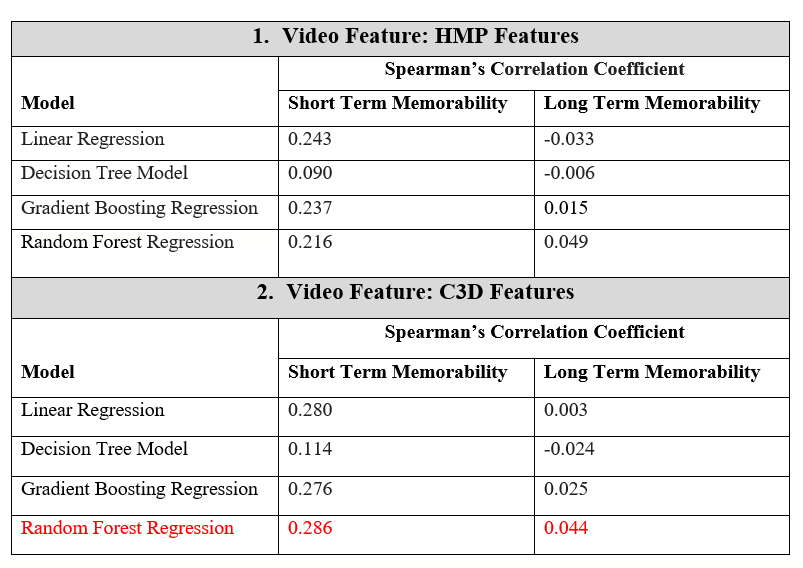



# **Final ML Model**

###**Test Set**

####Importing the Ground truth Dataset for test set

In [351]:
df_test_ground_truth = pd.read_csv("/content/drive/MyDrive/ML/CA684_Assignment/Test-set/Ground-truth_test/ground_truth_template.csv")
df_test_ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,NaN,33,NaN,12
1,7495,NaN,34,NaN,10
2,7496,NaN,32,NaN,13
3,7497,NaN,33,NaN,10
4,7498,NaN,33,NaN,10


#####drop irrelevant columns

In [ ]:
#drop irrelevant columns
df_test_ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis =1, inplace=True)
df_test_ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,7494,NaN,NaN
1,7495,NaN,NaN
2,7496,NaN,NaN
3,7497,NaN,NaN
4,7498,NaN,NaN


In [ ]:
#append prefix as 'video' for each values in video column
df_test_ground_truth['video'] = 'video' + df_test_ground_truth['video'].astype(str)
df_test_ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video7494,NaN,NaN
1,video7495,NaN,NaN
2,video7496,NaN,NaN
3,video7497,NaN,NaN
4,video7498,NaN,NaN


### Write ground truth test data frame into pickle file

In [ ]:
write_pickle(df_test_ground_truth,'df_test_ground_truth.p')

Start Pickle Load time: 2021-04-27 14:38:34.650213
End Pickle Load time: 2021-04-27 14:38:34.662674   Duration:0:00:00.012461


In [352]:
#read pickle file of ground truth
df_test_ground_truth=read_pickle('df_test_ground_truth.p')
#Display  ground truth
df_test_ground_truth.head()

Start Pickle Load time: 2021-04-27 16:09:20.149655
End Pickle Load time: 2021-04-27 16:09:20.157715   Duration:0:00:00.008060


,video,short-term_memorability,long-term_memorability
0,video7494,NaN,NaN
1,video7495,NaN,NaN
2,video7496,NaN,NaN
3,video7497,NaN,NaN
4,video7498,NaN,NaN


####**Importing the C3D Features for test set and stored it in pickle file**

In [ ]:
C3DFeatures_list1= []
videoNames_list1 = []
for filename in glob.glob(path_def+'Test-set/C3D_test/*.txt'):
    name = ((filename.split('/')[-1]).split('.')[0])
    videoNames_list1.append(name)
    C3DFeatures1 = read_C3D(filename)
    C3DFeatures_list1.append(C3DFeatures1)

In [ ]:
videoNames_list1 #display video list

In [ ]:
C3DFeatures_list1 #display C3DFeatures_list

In [ ]:
# Store it into variable 'df_C3D'
df_C3D1=pd.DataFrame(C3DFeatures_list1)


In [ ]:
# Store it into variable 'df_C3D_Video' 
df_C3D_Video1=pd.DataFrame(videoNames_list1)
#give name to column as video
df_C3D_Video1.columns=['video']

In [ ]:
#Join two variables
df_C3DJoin1=pd.concat([df_C3D_Video1,df_C3D1],axis=1)
df_C3DJoin1

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video8768,0.003526,0.001376,0.046187,7.760000e-06,4.117000e-05,2.948900e-04,3.431900e-04,4.057100e-04,6.992000e-05,0.000015,3.539800e-04,0.000599,0.000349,0.004517,1.565000e-05,5.500000e-05,5.680000e-05,1.536000e-05,1.409000e-05,1.451600e-04,4.290000e-06,1.532087e-01,6.900000e-07,2.890000e-05,2.325810e-03,1.334100e-04,0.002068,1.198000e-05,2.578000e-05,1.545800e-04,9.040000e-06,4.806200e-04,1.428600e-04,3.594800e-04,1.008580e-03,1.143200e-04,4.409000e-05,1.411000e-05,4.493500e-04,...,2.175051e-02,2.487600e-04,0.000621,0.000640,0.012609,0.000678,3.944600e-04,0.003184,1.618000e-05,0.000394,1.934000e-05,8.126100e-04,0.002481,3.760000e-06,1.872000e-05,4.920000e-06,0.001956,2.810000e-06,2.624000e-05,6.459000e-05,1.332000e-04,6.531100e-04,5.663000e-05,0.000097,1.134180e-03,0.000240,0.000036,2.230000e-05,5.704000e-05,0.000495,1.142530e-03,3.210800e-04,1.673800e-04,5.811330e-03,2.516000e-04,4.400000e-07,5.684000e-04,0.000051,0.000067,0.682813
1,video8759,0.007772,0.002302,0.003671,4.773000e-05,1.676000e-05,1.847000e-05,2.618600e-04,1.289600e-04,7.876000e-05,0.000027,1.174700e-04,0.000437,0.003945,0.000028,8.990000e-06,8.433700e-04,1.087000e-04,1.924000e-05,8.012600e-04,1.316000e-05,3.240000e-06,1.052590e-03,1.023580e-03,5.439000e-05,1.441502e-02,1.974000e-05,0.000030,8.732000e-05,4.830700e-04,1.209890e-03,8.138000e-05,5.054500e-04,1.729110e-03,1.730700e-04,1.497600e-04,1.256100e-04,1.855200e-04,1.690800e-04,4.680000e-04,...,2.734630e-03,1.655870e-03,0.003851,0.000111,0.001212,0.000126,1.242000e-05,0.000106,1.869800e-04,0.000111,3.797700e-04,3.940000e-05,0.000077,3.551000e-05,6.488700e-04,6.266000e-05,0.000469,2.395000e-05,1.465150e-03,2.346849e-01,4.729500e-04,3.030400e-04,6.653800e-04,0.000614,6.651000e-05,0.000004,0.001427,1.660000e-06,1.916700e-04,0.001640,1.099100e-03,2.225000e-04,1.110000e-05,8.693400e-04,6.538000e-05,6.150000e-06,2.710900e-04,0.017517,0.666933,0.002858
2,video8762,0.001573,0.001398,0.071723,2.488000e-05,1.902000e-05,8.270000e-04,6.838070e-03,1.359300e-04,2.904000e-05,0.000239,5.657900e-04,0.000672,0.000265,0.000454,1.338000e-05,3.156000e-04,5.110800e-04,8.040000e-06,9.750000e-06,3.740000e-06,1.034000e-05,1.801030e-03,1.660000e-06,4.661000e-05,4.602800e-04,3.115000e-05,0.000425,1.333400e-04,1.445600e-03,2.483600e-04,1.712200e-04,5.526000e-05,6.298570e-03,2.643500e-04,5.318000e-05,2.580000e-06,8.437000e-05,3.717900e-04,1.093100e-04,...,4.569470e-03,3.979090e-03,0.003753,0.002594,0.003642,0.030717,3.481370e-03,0.000595,1.133000e-05,0.000506,1.954000e-04,5.344000e-05,0.000353,8.660000e-06,1.816000e-04,9.014000e-05,0.000233,1.899890e-03,3.447500e-04,1.822000e-04,2.582200e-04,1.013890e-03,5.393000e-05,0.000069,1.925300e-04,0.001410,0.000869,1.412000e-05,8.568000e-05,0.001698,4.608000e-05,1.467470e-03,1.279700e-04,1.019300e-04,7.200000e-06,3.577000e-05,1.543550e-03,0.000034,0.000837,0.804485
3,video8765,0.000358,0.003973,0.008803,7.740530e-03,4.029200e-04,1.938100e-04,9.094740e-03,1.752904e-02,2.852800e-04,0.000026,3.279300e-04,0.013337,0.000007,0.000169,1.221300e-04,6.851600e-04,8.164600e-04,3.790000e-06,1.249030e-03,2.968900e-04,1.730540e-03,1.745752e-02,4.575800e-04,1.184056e-02,6.208798e-02,9.157400e-04,0.000033,1.933390e-03,1.349800e-03,3.050290e-03,2.015700e-04,1.381579e-01,2.006050e-03,2.664000e-05,1.112671e-02,2.893917e-02,7.646010e-03,1.535432e-02,6.984520e-03,...,2.570800e-04,8.891300e-04,0.001144,0.003669,0.006591,0.000239,4.588470e-03,0.003227,4.836100e-04,0.000935,6.927425e-02,4.976600e-04,0.016600,2.261100e-04,8.663884e-02,1.025600e-04,0.001129,2.641000e-05,4.527080e-03,3.471980e-03,4.550892e-02,6.679720e-03,1.158050e-03,0.001092,1.939896e-02,0.001620,0.004252,3.154230e-03,5.585500e-04,0.014796,1.822863e-02,5.824094e-02,2.662220e-03,2.824549e-02,5.214700e-04,5.476000e-

In [ ]:
#Write it into pickle file
write_pickle(df_C3DJoin1,'df_test_C3D.p')

Start Pickle Load time: 2021-04-27 14:39:09.177800
End Pickle Load time: 2021-04-27 14:39:09.196273   Duration:0:00:00.018473


In [353]:
#read pickle file of df_train_C3D
df_test_C3D=read_pickle('df_test_C3D.p')

Start Pickle Load time: 2021-04-27 16:09:46.004195
End Pickle Load time: 2021-04-27 16:09:46.019498   Duration:0:00:00.015303


In [356]:
#Display df_train_C3D
df_test_C3D.head()

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video8768,0.003526,0.001376,0.046187,0.000008,0.000041,0.000295,0.000343,0.000406,0.000070,0.000015,3.539800e-04,0.000599,0.000349,0.004517,0.000016,5.500000e-05,0.000057,1.536000e-05,0.000014,0.000145,4.290000e-06,0.153209,6.900000e-07,0.000029,2.325810e-03,0.000133,0.002068,0.000012,0.000026,0.000155,0.000009,0.000481,0.000143,3.594800e-04,1.008580e-03,0.000114,0.000044,1.411000e-05,0.000449,...,2.175051e-02,2.487600e-04,0.000621,0.000640,0.012609,0.000678,0.000394,0.003184,0.000016,0.000394,1.934000e-05,0.000813,0.002481,0.000004,0.000019,4.920000e-06,0.001956,0.000003,0.000026,0.000065,0.000133,0.000653,0.000057,0.000097,0.001134,0.000240,0.000036,0.000022,0.000057,0.000495,1.142530e-03,3.210800e-04,1.673800e-04,5.811330e-03,0.000252,4.400000e-07,0.000568,0.000051,0.000067,0.682813
1,video8759,0.007772,0.002302,0.003671,0.000048,0.000017,0.000018,0.000262,0.000129,0.000079,0.000027,1.174700e-04,0.000437,0.003945,0.000028,0.000009,8.433700e-04,0.000109,1.924000e-05,0.000801,0.000013,3.240000e-06,0.001053,1.023580e-03,0.000054,1.441502e-02,0.000020,0.000030,0.000087,0.000483,0.001210,0.000081,0.000505,0.001729,1.730700e-04,1.497600e-04,0.000126,0.000186,1.690800e-04,0.000468,...,2.734630e-03,1.655870e-03,0.003851,0.000111,0.001212,0.000126,0.000012,0.000106,0.000187,0.000111,3.797700e-04,0.000039,0.000077,0.000036,0.000649,6.266000e-05,0.000469,0.000024,0.001465,0.234685,0.000473,0.000303,0.000665,0.000614,0.000067,0.000004,0.001427,0.000002,0.000192,0.001640,1.099100e-03,2.225000e-04,1.110000e-05,8.693400e-04,0.000065,6.150000e-06,0.000271,0.017517,0.666933,0.002858
2,video8762,0.001573,0.001398,0.071723,0.000025,0.000019,0.000827,0.006838,0.000136,0.000029,0.000239,5.657900e-04,0.000672,0.000265,0.000454,0.000013,3.156000e-04,0.000511,8.040000e-06,0.000010,0.000004,1.034000e-05,0.001801,1.660000e-06,0.000047,4.602800e-04,0.000031,0.000425,0.000133,0.001446,0.000248,0.000171,0.000055,0.006299,2.643500e-04,5.318000e-05,0.000003,0.000084,3.717900e-04,0.000109,...,4.569470e-03,3.979090e-03,0.003753,0.002594,0.003642,0.030717,0.003481,0.000595,0.000011,0.000506,1.954000e-04,0.000053,0.000353,0.000009,0.000182,9.014000e-05,0.000233,0.001900,0.000345,0.000182,0.000258,0.001014,0.000054,0.000069,0.000193,0.001410,0.000869,0.000014,0.000086,0.001698,4.608000e-05,1.467470e-03,1.279700e-04,1.019300e-04,0.000007,3.577000e-05,0.001544,0.000034,0.000837,0.804485
3,video8765,0.000358,0.003973,0.008803,0.007741,0.000403,0.000194,0.009095,0.017529,0.000285,0.000026,3.279300e-04,0.013337,0.000007,0.000169,0.000122,6.851600e-04,0.000816,3.790000e-06,0.001249,0.000297,1.730540e-03,0.017458,4.575800e-04,0.011841,6.208798e-02,0.000916,0.000033,0.001933,0.001350,0.003050,0.000202,0.138158,0.002006,2.664000e-05,1.112671e-02,0.028939,0.007646,1.535432e-02,0.006985,...,2.570800e-04,8.891300e-04,0.001144,0.003669,0.006591,0.000239,0.004588,0.003227,0.000484,0.000935,6.927425e-02,0.000498,0.016600,0.000226,0.086639,1.025600e-04,0.001129,0.000026,0.004527,0.003472,0.045509,0.006680,0.001158,0.001092,0.019399,0.001620,0.004252,0.003154,0.000559,0.014796,1.822863e-02,5.824094e-02,2.662220e-03,2.824549e-02,0.000521,5.476000e-05,0.002431,0.000706,0.045552,0.001591
4,video8758,0.000001,0.000012,0.000025,0.000012,0.000058,0.000572,0.000002,0.000002,0.000030,0.000003,1.400000e-07,0.001003,0.000391,0.000002,0.000004,7.800000e-07,0.000008,8.700000e-07,0.000134,0.000001,9.800000e-07,0.069743,3.310000e-06,0.000528,2.800000e-07,0.000045,0.000013,0.000007,0.000002,0.000002,0.031410,0.000437,0.000003,1.300000e-07,2.000000e-08,0.000045,0.000117,4.900000e-07,0.000001,...,4.900000e-07,6.500000e-07,0.000005,0.000036,0.000022,0.000002,0.000051,0.000002,0.000019,0.000003,4.000000e-07,0.000324,0.869472,0.000120,0.005333,2.000000e-08,0.

####**Short Term Memorability Data Set for Test**

In [347]:
#Create training set for short-term_memorability
df_test_GTShortMem_C3D= pd.merge(df_test_ground_truth[['video','short-term_memorability']],df_test_C3D,on='video')


In [358]:
df_test_GTShortMem_C3D.head(5)

,video,short-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video7494,NaN,0.000136,0.000213,0.001248,0.000011,1.180000e-06,4.276000e-05,5.800000e-07,5.820000e-06,0.000007,0.000070,0.000010,7.906000e-05,0.710071,0.000195,9.400000e-07,0.000017,0.000050,2.541000e-05,0.000032,1.400000e-07,5.000000e-08,4.603586e-02,1.200000e-07,6.230000e-06,0.000040,4.790000e-06,0.008115,0.000003,7.500000e-07,1.850000e-06,0.000002,0.000043,1.786000e-05,0.002162,0.000062,1.770000e-06,0.000009,0.000005,...,0.000837,0.000003,0.011916,0.001389,0.000074,0.006642,0.000004,0.000056,8.690000e-06,0.000006,0.000005,3.268000e-05,0.007196,1.192000e-05,0.000002,6.500000e-07,0.000137,6.000000e-08,0.000019,0.000018,0.000002,0.001076,2.900000e-07,0.000012,1.623000e-05,1.258000e-05,4.800000e-07,2.800000e-06,2.100000e-07,0.000011,0.000003,5.620000e-06,1.260000e-06,0.000199,1.500000e-06,2.000000e-07,5.840000e-06,0.000006,0.000210,0.195120
1,video7495,NaN,0.000127,0.000024,0.049501,0.000024,2.361000e-05,3.440000e-06,5.102000e-05,1.240200e-04,0.000023,0.000018,0.000005,5.068000e-05,0.000059,0.000061,5.740000e-06,0.000014,0.000014,3.000000e-07,0.000107,1.161000e-05,3.300000e-07,6.583111e-01,8.100000e-07,6.510000e-06,0.005096,8.620000e-06,0.000186,0.000002,1.425000e-05,5.450000e-06,0.000003,0.000596,8.147600e-04,0.000033,0.000191,8.489210e-03,0.000033,0.000055,...,0.000209,0.000072,0.000088,0.000057,0.000024,0.000071,0.000087,0.000111,2.413000e-05,0.000048,0.000005,5.358000e-05,0.001198,1.995300e-04,0.000014,1.450000e-06,0.001653,3.971000e-05,0.000426,0.000129,0.000123,0.002179,7.300400e-04,0.000004,1.556400e-04,3.030000e-06,8.947000e-04,7.057000e-05,1.720000e-06,0.000069,0.000173,3.019200e-04,2.649800e-04,0.000163,1.050000e-05,2.540000e-06,3.619300e-04,0.000016,0.000010,0.000392
2,video7496,NaN,0.488982,0.000585,0.000025,0.000160,2.400000e-07,8.300000e-07,3.620000e-06,5.200000e-07,0.000027,0.000003,0.000019,8.100000e-07,0.001761,0.000187,3.900000e-07,0.000016,0.000009,4.100000e-06,0.000010,1.156760e-03,2.500000e-07,1.400000e-07,7.400000e-07,1.000000e-07,0.004153,2.530000e-06,0.000004,0.000001,1.550000e-06,3.720000e-06,0.000003,0.000009,6.900000e-07,0.268456,0.000034,1.900000e-07,0.000025,0.000034,...,0.000092,0.008434,0.000041,0.001036,0.000180,0.000025,0.000002,0.000009,2.500000e-07,0.000088,0.001960,3.656000e-05,0.000076,3.900000e-07,0.000010,1.330000e-06,0.213938,1.300000e-07,0.000012,0.000048,0.000009,0.000302,2.000000e-08,0.000001,3.900000e-07,7.486000e-05,1.811000e-05,5.000000e-08,7.400000e-07,0.000004,0.000002,1.900000e-07,3.200000e-07,0.001802,2.640000e-06,9.000000e-08,2.600000e-07,0.000067,0.000123,0.000015
3,video7497,NaN,0.249251,0.001018,0.000008,0.000019,2.200000e-07,8.800000e-07,1.646560e-02,4.701000e-05,0.000025,0.000002,0.000013,1.460000e-05,0.000085,0.000674,8.130000e-06,0.000008,0.000001,2.000000e-07,0.000005,4.046639e-01,3.227000e-05,1.700000e-07,3.600000e-07,1.993000e-05,0.000537,8.600000e-07,0.000020,0.000005,4.137000e-05,7.000000e-07,0.000028,0.000067,5.197000e-05,0.000002,0.000033,8.600000e-07,0.000207,0.000016,...,0.000032,0.289616,0.000064,0.019952,0.000443,0.000053,0.000001,0.000001,3.750000e-06,0.000002,0.000091,8.600000e-07,0.000278,2.100000e-07,0.000013,3.800000e-07,0.008628,4.920000e-06,0.000017,0.000005,0.000050,0.000174,1.967000e-05,0.000008,2.710000e-06,1.077000e-05,8.591000e-05,1.900000e-07,5.170000e-06,0.000031,0.000065,8.400000e-07,1.700000e-07,0.000808,9.700000e-07,7.670000e-06,9.100000e-07,0.000015,0.000707,0.000010
4,video7498,NaN,0.009894,0.000034,0.002613,0.000002,1.010000e-06,8.770000e-06,2.610000e-06,4.500000e-07,0.000005,0.000088,0.000048,5.760000e-06,0.937597,0.000006,5.940000e-06,0.000053,0.000001,2.224000e-05,0.000008,2.600000e-07,2.200000e-07,3.331540e-03,2.870000e-06,2.300000e-07,0.000010,1.850000e-06,0.000020,0.000008,2.80

#####Write test data set into pickle file 

In [344]:
#write short_term_memorability in pickle file
write_pickle(df_test_GTShortMem_C3D,'df_test_GTShortMem_C3D.p')

Start Pickle Load time: 2021-04-27 15:29:00.336265
End Pickle Load time: 2021-04-27 15:29:00.357710   Duration:0:00:00.021445


#####Create Test  Variables X and Y  for Short Term Memorability.

In [363]:
#Assign features to X and Y_Short
X_Test = df_test_GTShortMem_C3D.iloc[:,2:103].values 
Y_Short_Test = df_test_GTShortMem_C3D.iloc[:,1:2].values #short-term-memorability


#####Create Train  Variables X and Y  for Short Term Memorability.

In [364]:
#Assign features to X and Y_Short
X_Train = df_train_GTShortMem_C3D.iloc[:,2:103].values 
Y_Short_Train = df_train_GTShortMem_C3D.iloc[:,1:2].values #short-term-memorability


#####**Apply Standard Scaler for X**

In [365]:
#Implement StandardScaler for X variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_Train)
Scaled_X_Train=scaler.transform(X_Train)

In [366]:
Scaled_X_Train

array([[-0.25482085, -0.19332208, -0.2808062 , ..., -0.17395477,
        -0.13882891, -0.30480917],
       [-0.35417371, -0.20032255, -0.2850671 , ..., -0.17596961,
        -0.22011217, -0.30818224],
       [-0.29669219, -0.20179978, -0.28109126, ..., -0.11757551,
        -0.22008727, -0.29794838],
       ...,
       [-0.35462829, -0.2081563 , -0.28613393, ..., -0.09768005,
        -0.17698651, -0.30164662],
       [ 0.95352566,  0.77425659, -0.28592107, ..., -0.17653516,
        -0.2174473 , -0.30300679],
       [-0.25314253, -0.1969534 , -0.2725333 , ..., -0.16848243,
        -0.1776033 , -0.2994463 ]])

#####**Apply PCA**

In [367]:
#Apply PCA
from sklearn.decomposition import PCA
PCA_Model = PCA(0.95)
PCA_X_Train=PCA_Model.fit_transform(Scaled_X_Train)
PCA_X_Train.shape
PCA_X_Test=PCA_Model.transform(X_Test)




In [368]:
PCA_X_Test

array([[-0.06632551,  0.0190908 ,  0.0019423 , ...,  0.00493538,
         0.00799505,  0.0071306 ],
       [-0.00848294, -0.01740219,  0.03826354, ...,  0.00422098,
        -0.03173469, -0.03059501],
       [-0.17468451,  0.06109427, -0.03183151, ..., -0.01951396,
         0.01234024,  0.00723921],
       ...,
       [-0.17472016,  0.05941073, -0.02525695, ..., -0.0078354 ,
         0.01156561,  0.01379995],
       [ 0.030617  , -0.02560951,  0.02919969, ..., -0.0089864 ,
         0.0164108 , -0.00055066],
       [-0.08135688,  0.01718276,  0.00744733, ...,  0.00568112,
         0.00399453,  0.0125157 ]])

#####**Apply Random Forest**

In [369]:
from sklearn.ensemble import RandomForestRegressor
Final_Model = RandomForestRegressor(n_estimators=100)
Final_Model.fit(PCA_X_Train,Y_Short_Train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [372]:
#Predict long-term memorability of y against the xtest value 
Y_Short_Predicted = Final_Model.predict(PCA_X_Test)


In [392]:
Y_Short_Predicted.shape

(2000,)

In [405]:
df_test_ground_truth['short-term_memorability'] =Y_Short_Predicted 
df_test_ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video7494,0.84866,0.79009
1,video7495,0.83852,0.77677
2,video7496,0.85152,0.78722
3,video7497,0.85645,0.80380
4,video7498,0.85268,0.79487


####**Long Term Memorability Data Set for Test**

In [373]:
#Create training set for long-term_memorability
df_test_GTLongMem_C3D= pd.merge(df_test_ground_truth[['video','long-term_memorability']],df_test_C3D,on='video')


In [374]:
df_test_GTLongMem_C3D.head(5)

,video,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video7494,NaN,0.000136,0.000213,0.001248,0.000011,1.180000e-06,4.276000e-05,5.800000e-07,5.820000e-06,0.000007,0.000070,0.000010,7.906000e-05,0.710071,0.000195,9.400000e-07,0.000017,0.000050,2.541000e-05,0.000032,1.400000e-07,5.000000e-08,4.603586e-02,1.200000e-07,6.230000e-06,0.000040,4.790000e-06,0.008115,0.000003,7.500000e-07,1.850000e-06,0.000002,0.000043,1.786000e-05,0.002162,0.000062,1.770000e-06,0.000009,0.000005,...,0.000837,0.000003,0.011916,0.001389,0.000074,0.006642,0.000004,0.000056,8.690000e-06,0.000006,0.000005,3.268000e-05,0.007196,1.192000e-05,0.000002,6.500000e-07,0.000137,6.000000e-08,0.000019,0.000018,0.000002,0.001076,2.900000e-07,0.000012,1.623000e-05,1.258000e-05,4.800000e-07,2.800000e-06,2.100000e-07,0.000011,0.000003,5.620000e-06,1.260000e-06,0.000199,1.500000e-06,2.000000e-07,5.840000e-06,0.000006,0.000210,0.195120
1,video7495,NaN,0.000127,0.000024,0.049501,0.000024,2.361000e-05,3.440000e-06,5.102000e-05,1.240200e-04,0.000023,0.000018,0.000005,5.068000e-05,0.000059,0.000061,5.740000e-06,0.000014,0.000014,3.000000e-07,0.000107,1.161000e-05,3.300000e-07,6.583111e-01,8.100000e-07,6.510000e-06,0.005096,8.620000e-06,0.000186,0.000002,1.425000e-05,5.450000e-06,0.000003,0.000596,8.147600e-04,0.000033,0.000191,8.489210e-03,0.000033,0.000055,...,0.000209,0.000072,0.000088,0.000057,0.000024,0.000071,0.000087,0.000111,2.413000e-05,0.000048,0.000005,5.358000e-05,0.001198,1.995300e-04,0.000014,1.450000e-06,0.001653,3.971000e-05,0.000426,0.000129,0.000123,0.002179,7.300400e-04,0.000004,1.556400e-04,3.030000e-06,8.947000e-04,7.057000e-05,1.720000e-06,0.000069,0.000173,3.019200e-04,2.649800e-04,0.000163,1.050000e-05,2.540000e-06,3.619300e-04,0.000016,0.000010,0.000392
2,video7496,NaN,0.488982,0.000585,0.000025,0.000160,2.400000e-07,8.300000e-07,3.620000e-06,5.200000e-07,0.000027,0.000003,0.000019,8.100000e-07,0.001761,0.000187,3.900000e-07,0.000016,0.000009,4.100000e-06,0.000010,1.156760e-03,2.500000e-07,1.400000e-07,7.400000e-07,1.000000e-07,0.004153,2.530000e-06,0.000004,0.000001,1.550000e-06,3.720000e-06,0.000003,0.000009,6.900000e-07,0.268456,0.000034,1.900000e-07,0.000025,0.000034,...,0.000092,0.008434,0.000041,0.001036,0.000180,0.000025,0.000002,0.000009,2.500000e-07,0.000088,0.001960,3.656000e-05,0.000076,3.900000e-07,0.000010,1.330000e-06,0.213938,1.300000e-07,0.000012,0.000048,0.000009,0.000302,2.000000e-08,0.000001,3.900000e-07,7.486000e-05,1.811000e-05,5.000000e-08,7.400000e-07,0.000004,0.000002,1.900000e-07,3.200000e-07,0.001802,2.640000e-06,9.000000e-08,2.600000e-07,0.000067,0.000123,0.000015
3,video7497,NaN,0.249251,0.001018,0.000008,0.000019,2.200000e-07,8.800000e-07,1.646560e-02,4.701000e-05,0.000025,0.000002,0.000013,1.460000e-05,0.000085,0.000674,8.130000e-06,0.000008,0.000001,2.000000e-07,0.000005,4.046639e-01,3.227000e-05,1.700000e-07,3.600000e-07,1.993000e-05,0.000537,8.600000e-07,0.000020,0.000005,4.137000e-05,7.000000e-07,0.000028,0.000067,5.197000e-05,0.000002,0.000033,8.600000e-07,0.000207,0.000016,...,0.000032,0.289616,0.000064,0.019952,0.000443,0.000053,0.000001,0.000001,3.750000e-06,0.000002,0.000091,8.600000e-07,0.000278,2.100000e-07,0.000013,3.800000e-07,0.008628,4.920000e-06,0.000017,0.000005,0.000050,0.000174,1.967000e-05,0.000008,2.710000e-06,1.077000e-05,8.591000e-05,1.900000e-07,5.170000e-06,0.000031,0.000065,8.400000e-07,1.700000e-07,0.000808,9.700000e-07,7.670000e-06,9.100000e-07,0.000015,0.000707,0.000010
4,video7498,NaN,0.009894,0.000034,0.002613,0.000002,1.010000e-06,8.770000e-06,2.610000e-06,4.500000e-07,0.000005,0.000088,0.000048,5.760000e-06,0.937597,0.000006,5.940000e-06,0.000053,0.000001,2.224000e-05,0.000008,2.600000e-07,2.200000e-07,3.331540e-03,2.870000e-06,2.300000e-07,0.000010,1.850000e-06,0.000020,0.000008,2.800

#####Write test data set into pickle file 

In [375]:
#write short_term_memorability in pickle file
write_pickle(df_test_GTLongMem_C3D,'df_test_GTLongMem_C3D.p')

Start Pickle Load time: 2021-04-27 16:18:35.141581
End Pickle Load time: 2021-04-27 16:18:35.162377   Duration:0:00:00.020796


#####Create Test  Variable Y  for Long Term Memorability.

In [376]:
#Assign features to Y_Long

Y_Long_Test = df_test_GTLongMem_C3D.iloc[:,1:2].values #long-term-memorability


#####Create Train  Variables  Y  for Long Term Memorability.

In [382]:

Y_Long_Train = df_train_GTLongMem_C3D.iloc[:,1:2].values #long-term-memorability


In [383]:
Y_Long_Train

array([[0.846],
       [0.667],
       [0.7  ],
       ...,
       [0.818],
       [1.   ],
       [0.615]])

#####**Apply Random Forest**

In [384]:
from sklearn.ensemble import RandomForestRegressor
Final_Model1 = RandomForestRegressor(n_estimators=100)
Final_Model1.fit(PCA_X_Train,Y_Long_Train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [385]:
#Predict long-term memorability of y against the xtest value 
Y_Long_Predicted = Final_Model1.predict(PCA_X_Test)


In [391]:
Y_Long_Predicted.shape

(2000,)

In [ ]:

df_test_ground_truth['long-term_memorability'] =Y_Long_Predicted 
df_test_ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video7494,NaN,0.79009
1,video7495,NaN,0.77677
2,video7496,NaN,0.78722
3,video7497,NaN,0.80380
4,video7498,NaN,0.79487


####Write predicted Groundtruth values into pickle file

In [406]:
write_pickle(df_test_ground_truth,'predicted_ground_truth.p')

Start Pickle Load time: 2021-04-27 16:45:46.310743
End Pickle Load time: 2021-04-27 16:45:46.327435   Duration:0:00:00.016692


In [407]:
#read pickle file of ground truth
df_predicted_ground_truth=read_pickle('predicted_ground_truth.p')

Start Pickle Load time: 2021-04-27 16:46:42.251576
End Pickle Load time: 2021-04-27 16:46:42.258198   Duration:0:00:00.006622


In [408]:
df_predicted_ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video7494,0.84866,0.79009
1,video7495,0.83852,0.77677
2,video7496,0.85152,0.78722
3,video7497,0.85645,0.80380
4,video7498,0.85268,0.79487


####Save Predicted GroundTruth Data frame as csv

In [412]:
df_predicted_ground_truth.to_csv('/content/drive/My Drive/ML/predicted_ground_truth.csv')